In [1]:
#Importation des Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Ouverture du ficher csv
df = pd.read_csv('/Users/nicolasgrolier/Desktop/Clustering/infos_utilisateur.csv')

In [3]:
df.head()

,prenom,age,genre,sport1,sport2,sport3,id,pdp,bio
0,elyas,22,m,foot,mma,basket,65f9656ac23cb,ano.png,Passionné de sport toujours en quête de défis....
1,jean,20,m,tennis,judo,escrime,65f965a1d8fde,ano.png,Mon objectif est d'atteindre l'excellence et d...
2,nicolas,20,m,athlé,foot,golf,65f9740e1581c,ano.png,Mon objectif est d'atteindre l'excellence et d...
3,alex,21,m,basket,baseball,ping-pong,66013ba5455b9,ano.png,aMon objectif est d'atteindre l'excellence et ...
4,alexandre,22,m,ultimate,judo,échecs,66013bc72d2df,ano.png,Mon objectif est d'atteindre l'excellence et d...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   prenom  22 non-null     object
 1   age     22 non-null     int64 
 2   genre   22 non-null     object
 3   sport1  22 non-null     object
 4   sport2  22 non-null     object
 5   sport3  22 non-null     object
 6   id      22 non-null     object
 7   pdp     22 non-null     object
 8   bio     22 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.7+ KB


In [5]:
df2 = df #Création d'une nouvelle dataframe pour avoir juste les colonnes qui nous intèressent 
df2 = df2.drop(columns=['prenom','id','pdp','bio']) #Supprime les colonnes inutiles aux traitement des données
df2


,age,genre,sport1,sport2,sport3
0,22,m,foot,mma,basket
1,20,m,tennis,judo,escrime
2,20,m,athlé,foot,golf
3,21,m,basket,baseball,ping-pong
4,22,m,ultimate,judo,échecs
5,23,f,tennis,rugby,karate
6,33,m,foot,foot américain,badminton
7,34,m,Rugball,rugby,golf
8,56,m,boxe,mma,chess boxing
9,40,f,Gym,basket,echecs


## <center>Application de la distance de Levenshtein</center>

In [6]:
# Levenshtein Distance
# Reference: https://leetcode.com/problems/edit-distance/discuss/159295/Python-solutions-and-intuition
# GitHub : https://github.com/Dylanlee777/5-Min-Machine-Learning/blob/master/6%20LevenshteinDistance.ipynb

def LevenshteinD(word1, word2):
    """Dynamic programming solution"""
    m = len(word1)
    n = len(word2)
    table = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        table[i][0] = i
    for j in range(n + 1):
        table[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                table[i][j] = table[i - 1][j - 1]
            else:
                table[i][j] = 1 + min(table[i - 1][j], table[i][j - 1], table[i - 1][j - 1])
                
    return table[-1][-1]

In [7]:
#Fonction renvoyant le nombre de personne dans la database
def nombrePeople():
    a=0
    for i in df['age']:
        a=a+1
    return a
nombrePeople()


22

In [8]:
for i in range(nombrePeople()):
    df2.loc[i,'genre'] = LevenshteinD("m",str(df.loc[i,'genre']))
    df2.loc[i,'sport1'] = LevenshteinD("foot",str(df.loc[i,'sport1']))
    df2.loc[i,'sport2'] = LevenshteinD("foot",str(df.loc[i,'sport2']))
    df2.loc[i,'sport3'] = LevenshteinD("foot",str(df.loc[i,'sport3']))
df2

,age,genre,sport1,sport2,sport3
0,22,0,0,4,5
1,20,0,6,4,7
2,20,0,5,0,3
3,21,0,5,8,8
4,22,0,7,4,6
5,23,1,6,5,5
6,33,0,0,10,8
7,34,0,7,5,3
8,56,0,3,4,11
9,40,1,4,5,6


## <center>Normalisation des data</center>

In [9]:
#On normalise les données entre -1 et 1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df2)
x_scaled

array([[-0.81844166, -0.75592895, -1.29889051, -0.58951157, -0.62558676],
       [-0.96663685, -0.75592895,  0.2597781 , -0.58951157,  0.47544594],
       [-0.96663685, -0.75592895,  0.        , -1.88643703, -1.72661947],
       [-0.89253925, -0.75592895,  0.        ,  0.70741389,  1.02596229],
       [-0.81844166, -0.75592895,  0.51955621, -0.58951157, -0.07507041],
       [-0.74434406,  1.32287566,  0.2597781 , -0.26528021, -0.62558676],
       [-0.00336807, -0.75592895, -1.29889051,  1.35587661,  1.02596229],
       [ 0.07072953, -0.75592895,  0.51955621, -0.26528021, -1.72661947],
       [ 1.70087669, -0.75592895, -0.51955621, -0.58951157,  2.67751134],
       [ 0.51531512,  1.32287566, -0.2597781 , -0.26528021, -0.07507041],
       [-1.04073445,  1.32287566,  1.81844672,  1.03164525,  0.47544594],
       [ 0.88580311, -0.75592895, -1.29889051, -0.58951157,  0.47544594],
       [-1.11483205, -0.75592895,  1.03911241,  0.38318252, -0.62558676],
       [ 2.36775508, -0.75592895,  0.2

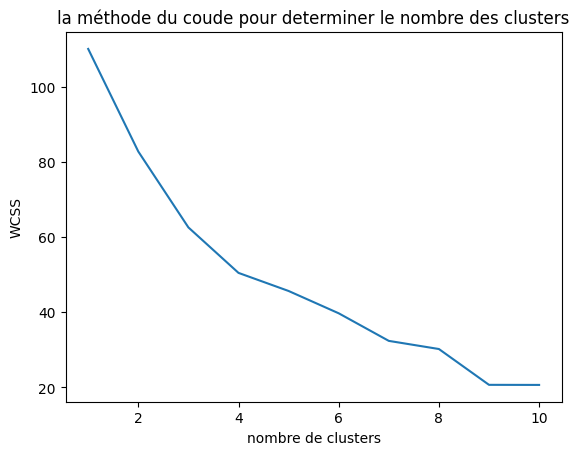

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('la méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans_etats = KMeans(n_clusters=5, init = 'k-means++') #Car cassure à nombre de clusters = 4
kmeans_etats.fit(x_scaled) #On applique l'Algorithme de Kmeans avec les data normalisées x_scaled
clusters = kmeans_etats.predict(x_scaled)
df['cluster']=clusters #Création d'une new dataframe qui permet d'ajouter le numéro du cluster en question
df

,prenom,age,genre,sport1,sport2,sport3,id,pdp,bio,cluster
0,elyas,22,m,foot,mma,basket,65f9656ac23cb,ano.png,Passionné de sport toujours en quête de défis....,0
1,jean,20,m,tennis,judo,escrime,65f965a1d8fde,ano.png,Mon objectif est d'atteindre l'excellence et d...,1
2,nicolas,20,m,athlé,foot,golf,65f9740e1581c,ano.png,Mon objectif est d'atteindre l'excellence et d...,0
3,alex,21,m,basket,baseball,ping-pong,66013ba5455b9,ano.png,aMon objectif est d'atteindre l'excellence et ...,1
4,alexandre,22,m,ultimate,judo,échecs,66013bc72d2df,ano.png,Mon objectif est d'atteindre l'excellence et d...,1
5,alexa,23,f,tennis,rugby,karate,66013bfbb5ae4,ano.png,Mon objectif est d'atteindre l'excellence et d...,3
6,jean,33,m,foot,foot américain,badminton,66013c235433e,ano.png,Mon objectif est d'atteindre l'excellence et d...,2
7,baptiste,34,m,Rugball,rugby,golf,660142f6aa164,ano.png,Mon objectif est d'atteindre l'excellence et d...,0
8,alain,56,m,boxe,mma,chess boxing,6601445490e75,ano.png,Mon objectif est d'atteindre l'excellence et d...,4
9,Oure,40,f,Gym,basket,echecs,6601448cc0a49,ano.png,Blabla bla blablbab llbaba lbalblab blablablab...,3


In [12]:
for i in range(4):
    print(f'Cluster {i}')
    print(df[df.cluster == i].index.tolist())
    print()

Cluster 0
[0, 2, 7]

Cluster 1
[1, 3, 4, 10, 12, 15]

Cluster 2
[6, 11, 16, 17]

Cluster 3
[5, 9, 14, 18, 19, 20, 21]



In [13]:
#Ajoute à la dataframe de base la colonne cluster
df['cluster']
df

,prenom,age,genre,sport1,sport2,sport3,id,pdp,bio,cluster
0,elyas,22,m,foot,mma,basket,65f9656ac23cb,ano.png,Passionné de sport toujours en quête de défis....,0
1,jean,20,m,tennis,judo,escrime,65f965a1d8fde,ano.png,Mon objectif est d'atteindre l'excellence et d...,1
2,nicolas,20,m,athlé,foot,golf,65f9740e1581c,ano.png,Mon objectif est d'atteindre l'excellence et d...,0
3,alex,21,m,basket,baseball,ping-pong,66013ba5455b9,ano.png,aMon objectif est d'atteindre l'excellence et ...,1
4,alexandre,22,m,ultimate,judo,échecs,66013bc72d2df,ano.png,Mon objectif est d'atteindre l'excellence et d...,1
5,alexa,23,f,tennis,rugby,karate,66013bfbb5ae4,ano.png,Mon objectif est d'atteindre l'excellence et d...,3
6,jean,33,m,foot,foot américain,badminton,66013c235433e,ano.png,Mon objectif est d'atteindre l'excellence et d...,2
7,baptiste,34,m,Rugball,rugby,golf,660142f6aa164,ano.png,Mon objectif est d'atteindre l'excellence et d...,0
8,alain,56,m,boxe,mma,chess boxing,6601445490e75,ano.png,Mon objectif est d'atteindre l'excellence et d...,4
9,Oure,40,f,Gym,basket,echecs,6601448cc0a49,ano.png,Blabla bla blablbab llbaba lbalblab blablablab...,3


In [14]:
#Création d'un fichier CSV
df.to_csv('newFileCSV.csv')
df.to_excel('newFileExcel.xlsx')